# PROBLEM C1

 Given two arrays, train a neural network model to match the X to the Y.
 Predict the model with new values of X [-2.0, 10.0]
 We provide the model prediction, do not change the code.

 The test infrastructure expects a trained model that accepts
 an input shape of [1]
 Do not use lambda layers in your model.

 Please be aware that this is a linear model.
 We will test your model with values in a range as defined in the array to make sure your model is linear.

# Desired loss (MSE) < 1e-4

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential

In [2]:
def solution_C1():
    # DO NOT CHANGE THIS CODE
    X = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
    Y = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)

    # YOUR CODE HERE
    normalizer = tf.keras.layers.Normalization(axis=None, input_shape=(1,), name="normalizer")
    normalizer.adapt(X)

    model = tf.keras.Sequential()
    model.add(normalizer)
    model.add(keras.layers.Dense(32))
    model.add(keras.layers.Dense(1))

    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    model.fit(X, Y, epochs=1000, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)])

    # Evaluate the model and check if the loss is less than 1e-4.
    loss, mse = model.evaluate(X, Y)
    assert mse < 1e-4, "\033[91mDesired loss not achieved! Got {:.6f} MSE.\033[0m".format(loss)

    print(model.predict(np.array([-2.0, 10.0])))
    return model

In [3]:

if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_C1()
    model.save("model_C1.h5")


Epoch 1/1000


c:\Users\srini\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step - loss: 5.3661 - mse: 5.3661
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2995 - mse: 5.2995
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.2335 - mse: 5.2335
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.1680 - mse: 5.1680
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.1030 - mse: 5.1030
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0386 - mse: 5.0386
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.9747 - mse: 4.9747
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.9113 - mse: 4.9113
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.8486 - mse: 4.8486
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.7863 - mse: 4.7863
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.7247 - mse: 4.7247
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6636 - mse: 4.6636
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/st

[[4.9471855e-06]
 [6.0000043e+00]]


# PROBLEM C2

 Create a classifier for the MNIST Handwritten digit dataset.
 The test will expect it to classify 10 classes.

 Don't use lambda layers in your model.

# Desired accuracy AND validation_accuracy > 91%

In [4]:
import tensorflow as tf

In [5]:
def solution_C2():
    mnist = tf.keras.datasets.mnist

    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
    training_images=training_images.reshape(60000, 28, 28, 1)
    training_images=training_images / 255.0
    test_images = test_images.reshape(10000, 28, 28, 1)
    test_images=test_images/255.0

    # DEFINE YOUR MODEL HERE
    # End with 10 Neuron Dense, activated by softmax
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])

    # COMPILE MODEL HERE
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    # TRAIN YOUR MODEL HERE
    model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=10, verbose=1)

    return model

In [6]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_C2()
    model.save("model_C2.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


c:\Users\srini\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9110 - loss: 0.2951 - val_accuracy: 0.9839 - val_loss: 0.0465
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9866 - loss: 0.0442 - val_accuracy: 0.9864 - val_loss: 0.0400
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0288 - val_accuracy: 0.9857 - val_loss: 0.0482
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0185 - val_accuracy: 0.9908 - val_loss: 0.0281
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9919 - val_loss: 0.0280
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9968 - loss: 0.0103 - val_accuracy: 0.9883 - val_loss: 0.0420
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9968 - loss: 0.0093 - val_accuracy: 0.9918 - val_loss: 0.0304
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9980 - loss: 0.0067 - val_accurac

# PROBLEM C3

 Build a CNN based classifier for Cats vs Dogs dataset.
 Your input layer should accept 150x150 with 3 bytes color as the input shape.
 This is unlabeled data, use ImageDataGenerator to automatically label it.
 Don't use lambda layers in your model.

 The dataset used in this problem is originally published in https://www.kaggle.com/c/dogs-vs-cats/data

# Desired accuracy and validation_accuracy > 72%

In [7]:
import tensorflow as tf
import urllib.request
import zipfile
import tensorflow as tf
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [8]:
def solution_C3():
    data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/cats_and_dogs.zip'
    urllib.request.urlretrieve(data_url, 'cats_and_dogs.zip')
    local_file = 'cats_and_dogs.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/')
    zip_ref.close()

    BASE_DIR = 'data/cats_and_dogs_filtered'
    train_dir = os.path.join(BASE_DIR, 'train')
    validation_dir = os.path.join(BASE_DIR, 'validation')

    train_datagenerator = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True, zoom_range=0.2, shear_range=0.1,
                                       rotation_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
    validation_datagen = ImageDataGenerator(rescale=1. / 255)

    # YOUR IMAGE SIZE SHOULD BE 150x150
    # Make sure you used "categorical"
    train_generator = train_datagenerator.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

    model = tf.keras.models.Sequential([
        # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer='nadam',
                  metrics=['accuracy'])

    model.fit(
        train_generator,
        epochs=30,
        validation_data=validation_generator,
        callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5,
                                                        min_lr=0.00001)])

    return model

In [9]:
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_C3()
    model.save("model_C3.h5")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


c:\Users\srini\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 362ms/step - accuracy: 0.4974 - loss: 1.8191 - val_accuracy: 0.5040 - val_loss: 0.6860 - learning_rate: 0.0010
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 356ms/step - accuracy: 0.5563 - loss: 0.6827 - val_accuracy: 0.6630 - val_loss: 0.6394 - learning_rate: 0.0010
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 367ms/step - accuracy: 0.6268 - loss: 0.6477 - val_accuracy: 0.6680 - val_loss: 0.5966 - learning_rate: 0.0010
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 364ms/step - accuracy: 0.6849 - loss: 0.5962 - val_accuracy: 0.6890 - val_loss: 0.5885 - learning_rate: 0.0010
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 371ms/step - accuracy: 0.6819 - loss: 0.5943 - val_accuracy: 0.6720 - val_loss: 0.5844 - learning_rate: 0.0010
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 381ms/step - accuracy: 0.7200 - loss: 0.5640 - val_accuracy: 0.7100 - val_loss: 0.5475 - learning_rate: 0.0010
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 373ms/step - accuracy: 0.7207 - loss: 0.5573 - val_

# PROBLEM C4

 Build and train a classifier for the sarcasm dataset.
 The classifier should have a final layer with 1 neuron activated by sigmoid.

 Do not use lambda layers in your model.

# Desired accuracy and validation_accuracy > 75%

In [10]:
import json
import tensorflow as tf
import numpy as np
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
def solution_C4():
    data_url = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/sarcasm.json'
    urllib.request.urlretrieve(data_url, 'sarcasm.json')

    # DO NOT CHANGE THIS CODE
    # Make sure you used all of these parameters or test may fail
    vocab_size = 1000
    embedding_dim = 16
    trunc_type = 'post'
    padding_type = 'post'
    oov_tok = "<OOV>"
    training_size = 20000

    sentences = []
    labels = []
    # YOUR CODE HERE
    with open('sarcasm.json', 'r') as json_read:
        getdata = json.load(json_read)

    for i in getdata:
        sentences.append(i['headline'])
        labels.append(i['is_sarcastic'])

    train_sentences = sentences[:training_size]
    train_labels = np.array(labels[:training_size])
    test_sentences = sentences[training_size:]
    test_labels = np.array(labels[training_size:])

    # Fit your tokenizer with training data
    # YOUR CODE HERE
    tokenizer = Tokenizer(num_words=vocab_size,
                           oov_token=oov_tok)
    tokenizer.fit_on_texts(train_sentences)

    training_seq = tokenizer.texts_to_sequences(train_sentences)
    train_sentences_pad = pad_sequences(training_seq,
                                    truncating=trunc_type,
                                    padding=padding_type)

    testing_seq = tokenizer.texts_to_sequences(test_sentences)
    test_sentences_pad = pad_sequences(testing_seq,
                                   truncating=trunc_type,
                                   padding=padding_type)

    model = tf.keras.Sequential([
        # YOUR CODE HERE. DO not change the last layer or test may fail
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Callback
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            # Check accuracy
            if (logs.get('accuracy') > 0.8 and logs.get('val_accuracy') > 0.8):
                # Stop if threshold is met
                print("\n\n\t=====================================")
                print("\t|| accuracy and val_accuracy > 80% ||")
                print("\t=====================================\n")
                self.model.stop_training = True
    # Instantiate class
    callbacks = myCallback()

    # Train model
    hys = model.fit(train_sentences_pad,
                    train_labels,
                    epochs=1000,
                    validation_data=(test_sentences_pad, test_labels),
                    callbacks=[callbacks])

    # Show accuracy and validation accuracy value
    accu = (hys.history['accuracy'][-1]) * 100
    valli = (hys.history['val_accuracy'][-1]) * 100
    print("\n\tAccuracy = " + "%.2f" % accu + "%")
    print("\tVal_accuracy = " + "%.2f" % valli + "%\n")

    return model

In [12]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_C4()
    model.save("model_C4.h5")

Epoch 1/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - accuracy: 0.5620 - loss: 0.6831 - val_accuracy: 0.6384 - val_loss: 0.6455
Epoch 2/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.6567 - loss: 0.6211 - val_accuracy: 0.7485 - val_loss: 0.5230
Epoch 3/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7551 - loss: 0.5049 - val_accuracy: 0.7824 - val_loss: 0.4636
Epoch 4/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.7846 - loss: 0.4538 - val_accuracy: 0.7971 - val_loss: 0.4376
Epoch 5/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.7987 - loss: 0.4282 - val_accuracy: 0.8016 - val_loss: 0.4222
Epoch 6/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8084 - loss: 0.4116 - val_accuracy: 0.7669 - val_loss: 0.4712
Epoch 7/1000
562/625 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8183 - loss: 0.3957

	|| accuracy and val_accuracy > 80% ||

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.8181 - loss: 0.3958 


	Accuracy = 81.66%
	Val_accuracy = 81.00%



# PROBLEM C5

 Build and train a neural network model using the Daily Min Temperature.csv dataset.
 Use MAE as the metrics of your neural network model.
 We provided code for normalizing the data. Please do not change the code.
 Do not use lambda layers in your model.

 The dataset used in this problem is downloaded from https://github.com/jbrownlee/Datasets

# Desired MAE < 0.19 on the normalized dataset.

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
import urllib

from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD

In [14]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

def solution_C5():
    data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
    urllib.request.urlretrieve(data_url, 'daily-min-temperatures.csv')

    time_step = []
    temps = []

    with open('daily-min-temperatures.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        step = 0
        for row in reader:
            temps.append(np.float32(row[1]))
            time_step.append(step)
            step = step + 1

    series = np.array(temps)

    # Normalization Function. DO NOT CHANGE THIS CODE
    min=np.min(series)
    max=np.max(series)
    series -= min
    series /= max
    time=np.array(time_step)

    # DO NOT CHANGE THIS CODE
    split_time=2500

    time_train = time[:split_time]
    x_train = series[:split_time]
    time_valid = time[split_time:]
    x_valid = series[split_time:]

    # DO NOT CHANGE THIS CODE
    window_size=64
    batch_size=256
    shuffle_buffer_size=1000

    train_set = windowed_dataset(
        x_train, window_size, batch_size, shuffle_buffer_size)
    print(train_set)
    print(x_train.shape)

    valid_set = windowed_dataset(
        x_valid, window_size, batch_size, shuffle_buffer_size)

    model=tf.keras.models.Sequential([
        # YOUR CODE HERE.
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(1),
    ])

    # YOUR CODE HERE
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])

    model.fit(train_set, epochs=100, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3), tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.0001)], validation_data=valid_set)

    # Get the model's prediction on the test set
    test_pred = model.predict(valid_set).flatten()

    # Only use the first 500 samples of the test set
    test_pred = test_pred[:len(x_valid)]
    x_valid = x_valid[:len(x_valid)]

    # Plot the predictions
    plt.plot(test_pred, 'r-', label='Prediction')
    plt.plot(x_valid, 'b-', label='Truth')

    plt.legend()
    plt.show()

    return model

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float32, name=None))>
(2500,)
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0919 - mae: 0.2723 - val_loss: 0.0195 - val_mae: 0.1282 - learning_rate: 0.0010
Epoch 2/100


c:\Users\srini\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0160 - mae: 0.1003 - val_loss: 0.0092 - val_mae: 0.0830 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0136 - mae: 0.0933 - val_loss: 0.0083 - val_mae: 0.0791 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0109 - mae: 0.0818 - val_loss: 0.0078 - val_mae: 0.0770 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0104 - mae: 0.0800 - val_loss: 0.0079 - val_mae: 0.0773 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mae: 0.0793 - val_loss: 0.0072 - val_mae: 0.0738 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0100 - mae: 0.0783 - val_loss: 0.0073 - val_mae: 0.0737 - learning_rate: 0.0010
Epoch 8/100
 4/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0103 - mae: 0.0794
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/

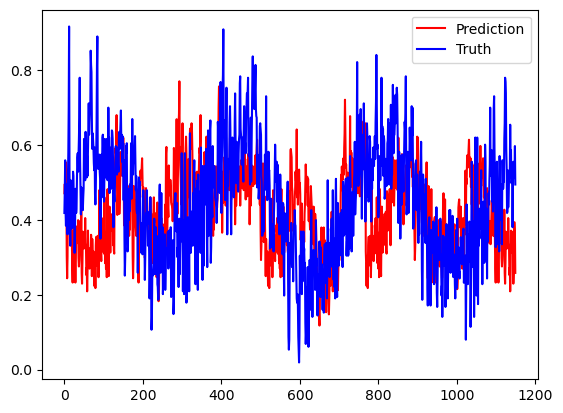

In [15]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model=solution_C5()
    model.save("model_C5.h5")